In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install odfpy

In [ ]:
import pandas as pd
dataFrame=pd.read_excel('/content/drive/MyDrive/dataFrame.ods' , engine='odf')

In [ ]:
dataFrame.head()

,Sr no,Vehicle,Tire type,Road condition,weather condition,Time,Accident Pos
0,1,Bike,Street,terrain,foggy,night,High
1,2,Bike,Street,terrain,sunny,night,High
2,3,Bike,Dual Sport,muddy,foggy,day,Low
3,4,Car,Normal Rib,concrete-wet,foggy,night,Low
4,5,Bike,Dual Sport,pitch,foggy,night,High


#Accident Possibility by tires type

<Axes: xlabel='Accident Pos'>

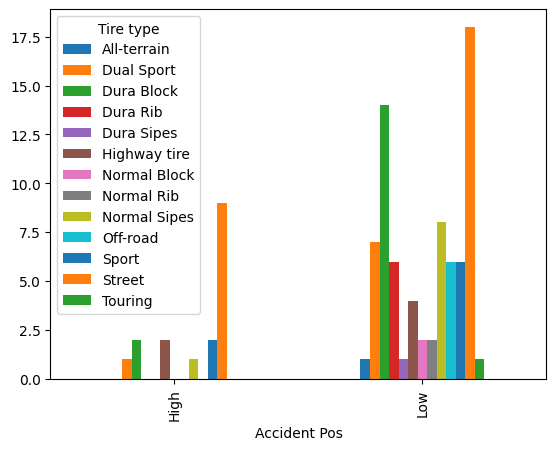

In [ ]:
dataFrame.groupby(['Accident Pos', 'Tire type']).size().unstack().plot(kind='bar')

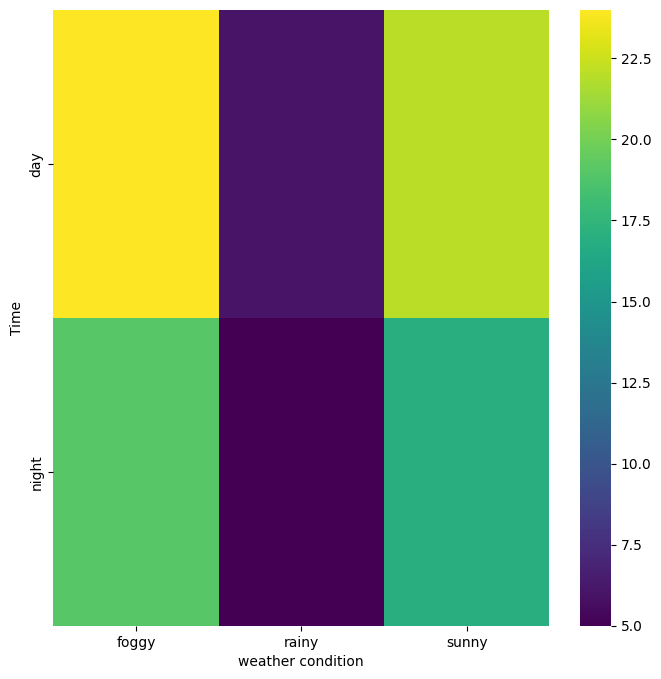

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Time'].value_counts()
    for x_label, grp in dataFrame.groupby('weather condition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('weather condition')
_ = plt.ylabel('Time')

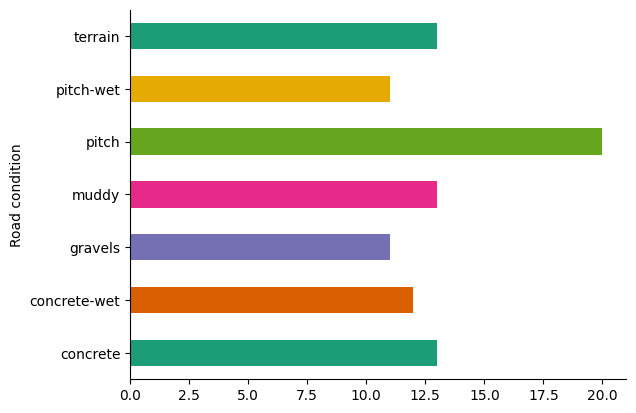

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataFrame.groupby('Road condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

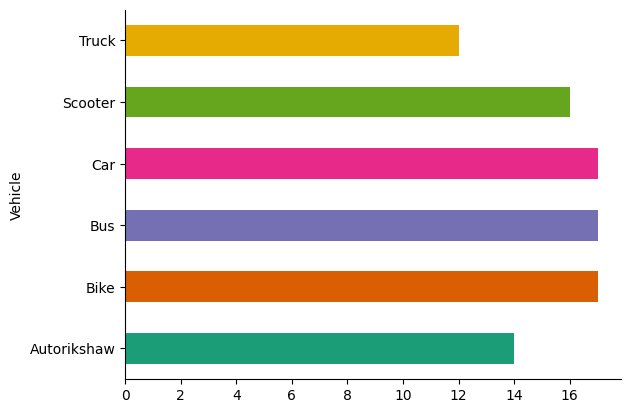

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataFrame.groupby('Vehicle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataFrame.groupby(['Vehicle']).count()

,Sr no,Tire type,Road condition,weather condition,Time,Accident Pos
Vehicle,,,,,,
Autorikshaw,14,14,14,14,14,14
Bike,17,17,17,17,17,17
Bus,17,17,17,17,17,17
Car,17,17,17,17,17,17
Scooter,16,16,16,16,16,16
Truck,12,12,12,12,12,12


In [ ]:

from sklearn.preprocessing import LabelEncoder

vehicle_le = LabelEncoder()
tire_le = LabelEncoder()
road_le = LabelEncoder()
weather_le = LabelEncoder()
time_le = LabelEncoder()
accident_le = LabelEncoder()

dataFrame["Vehicle_n"] = vehicle_le.fit_transform(dataFrame["Vehicle"])
dataFrame["Tire type_n"] = tire_le.fit_transform(dataFrame["Tire type"])
dataFrame["Road condition_n"] = road_le.fit_transform(dataFrame["Road condition"])
dataFrame["weather condition_n"] = weather_le.fit_transform(dataFrame["weather condition"])
dataFrame["Time_n"] = time_le.fit_transform(dataFrame["Time"])
dataFrame["Accident Pos_n"] = accident_le.fit_transform(dataFrame["Accident Pos"])
dataFrame.head()

,Sr no,Vehicle,Tire type,Road condition,weather condition,Time,Accident Pos,Vehicle_n,Tire type_n,Road condition_n,weather condition_n,Time_n,Accident Pos_n
0,1,Bike,Street,terrain,foggy,night,High,1,11,6,0,1,0
1,2,Bike,Street,terrain,sunny,night,High,1,11,6,2,1,0
2,3,Bike,Dual Sport,muddy,foggy,day,Low,1,1,3,0,0,1
3,4,Car,Normal Rib,concrete-wet,foggy,night,Low,3,7,1,0,1,1
4,5,Bike,Dual Sport,pitch,foggy,night,High,1,1,4,0,1,0


In [ ]:
dataFrame=dataFrame.drop('Sr no'  ,axis=1)

In [ ]:
print(dataFrame.to_string(index=False))

 Vehicle_n  Tire type_n  Road condition_n  weather condition_n  Time_n  Accident Pos_n
         1           11                 6                    0       1               0
         1           11                 6                    2       1               0
         1            1                 3                    0       0               1
         3            7                 1                    0       1               1
         1            1                 4                    0       1               0
         1           10                 0                    0       0               1
         3            6                 4                    2       1               1
         2            5                 6                    0       0               0
         5            0                 4                    2       0               1
         1           12                 6                    2       0               1
         4           11                 3  

In [ ]:
inputdataFrame = dataFrame.drop('Accident Pos_n' , axis=1)
targetdataFrame = dataFrame['Accident Pos_n'].copy()

In [ ]:
inputdataFrame.head()

,Vehicle_n,Tire type_n,Road condition_n,weather condition_n,Time_n
0,1,11,6,0,1
1,1,11,6,2,1
2,1,1,3,0,0
3,3,7,1,0,1
4,1,1,4,0,1


In [ ]:
targetdataFrame.head()

0    0
1    0
2    1
3    1
4    0
Name: Accident Pos_n, dtype: int64

#Made the Decision Tree after Cleaning the Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Vehicle_n', 'Tire type_n','Road condition_n','weather condition_n','Time_n'])
    ],
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(inputdataFrame)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, targetdataFrame , test_size=0.4, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.868421052631579


#Achieved 86% Accuracy with 40% test data